# Introduction to Statistics in R

## Summary Statistics

### Mean and median

In [2]:
install.packages("readr")
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/_n/j4yxcfdd4hndhcyg8xh51sc00000gn/T//Rtmp3UyCVq/downloaded_packages

The downloaded binary packages are in
	/var/folders/_n/j4yxcfdd4hndhcyg8xh51sc00000gn/T//Rtmp3UyCVq/downloaded_packages


In [3]:
library(readr)

In [4]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
food_consumption <- read_csv("food.csv")

Rows: 1430 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, food_category
dbl (2): consumption, co2_emission

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
food_consumption

country,food_category,consumption,co2_emission
<chr>,<chr>,<dbl>,<dbl>
Argentina,pork,10.51,37.20
Argentina,poultry,38.66,41.53
Argentina,beef,55.48,1712.00
Argentina,lamb_goat,1.56,54.63
Argentina,fish,4.36,6.96
Argentina,eggs,11.39,10.46
Argentina,dairy,195.08,277.87
Argentina,wheat,103.11,19.66
Argentina,rice,8.77,11.22


### Mean and median

In [7]:

belgium_consumption <- food_consumption %>% 
    filter(country=="Belgium")


usa_consumption <- food_consumption %>% 
    filter(country=="USA")


mean(belgium_consumption$consumption)
median(belgium_consumption$consumption)


mean(usa_consumption$consumption)
median(usa_consumption$consumption)

[1] 42.13273

[1] 12.59

[1] 44.65

[1] 14.58

In [8]:
food_consumption %>%
  
  filter(country %in% c("Belgium", "USA")) %>%
  
  group_by(country) %>%
  
  summarize(mean_consumption = mean(consumption),
      median_consumption = median(consumption))

country,mean_consumption,median_consumption
<chr>,<dbl>,<dbl>
Belgium,42.13273,12.59
USA,44.65000,14.58


### Mean vs. median

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


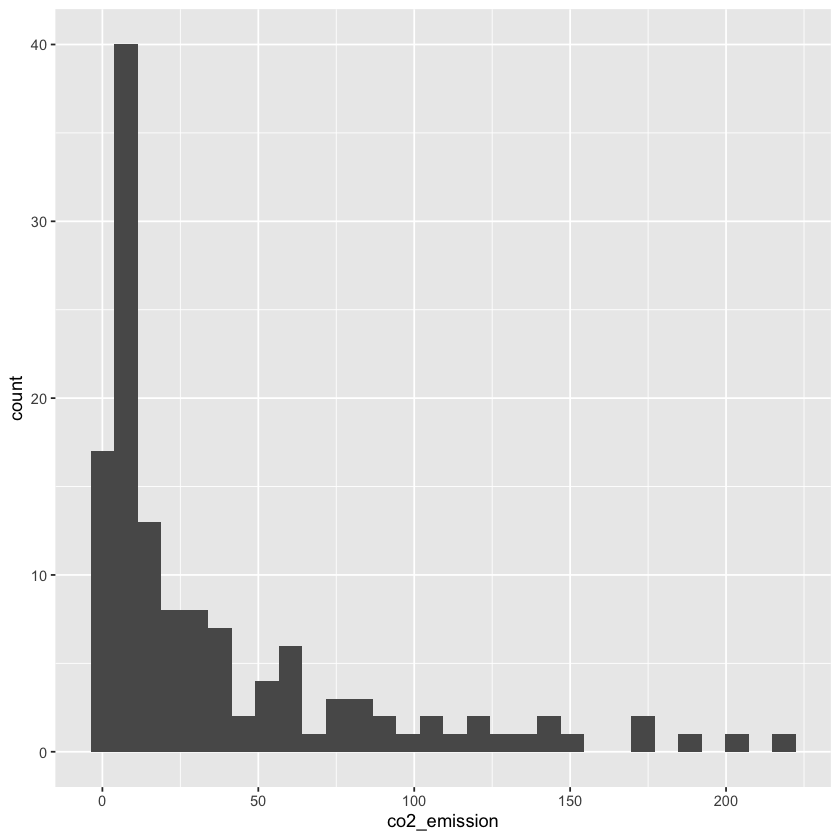

In [9]:
food_consumption %>%
  
  filter(food_category == "rice") %>%
  
  ggplot(aes(co2_emission)) +
    geom_histogram()

In [10]:
food_consumption %>%
  
  filter(food_category == "rice") %>%
  
  summarize(mean_co2 = mean(co2_emission),
            median_co2 = median(co2_emission))

mean_co2,median_co2
<dbl>,<dbl>
37.59162,15.2


### Quartiles, quantiles, and quintiles

In [11]:

quantile(food_consumption$co2_emission)

0%       25%       50%       75%      100% 
   0.0000    5.2100   16.5300   62.5975 1712.0000

In [12]:

quantile(food_consumption$co2_emission, probs = c(0,0.2,0.4,0.6,0.8, 1))


0%      20%      40%      60%      80%     100% 
   0.000    3.540   11.026   25.590   99.978 1712.000

In [13]:

quantile(food_consumption$co2_emission, probs = seq(0,1,0.1))

0%      10%      20%      30%      40%      50%      60%      70% 
   0.000    0.668    3.540    7.040   11.026   16.530   25.590   44.271 
     80%      90%     100% 
  99.978  203.629 1712.000